## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [2]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("LoanStatus.csv")

In [4]:
columns_to_analyze = ["ApplicantIncome", "LoanAmount"]

for column in columns_to_analyze:
    column_min = df[column].min()
    column_max = df[column].max()
    column_mean = df[column].mean()
    column_median = df[column].median()

    print(f"Column: {column}")
    print(f"Minimum: {column_min}")
    print(f"Maximum: {column_max}")
    print(f"Mean: {column_mean}")
    print(f"Median: {column_median}")
    print("\n")


Column: ApplicantIncome
Minimum: 150
Maximum: 81000
Mean: 5403.459283387622
Median: 3812.5


Column: LoanAmount
Minimum: 9.0
Maximum: 700.0
Mean: 146.41216216216216
Median: 128.0




In [5]:
blank_count = df.isnull().sum()
print(blank_count)

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [6]:
loan_approval_probability = df['Loan_Status'].value_counts(normalize=True)
print(loan_approval_probability)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


In [7]:
good_credit_history_approval = df[df['Credit_History'] == 1]['Loan_Status'].value_counts(normalize=True)
print(good_credit_history_approval)

Y    0.795789
N    0.204211
Name: Loan_Status, dtype: float64


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html 

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

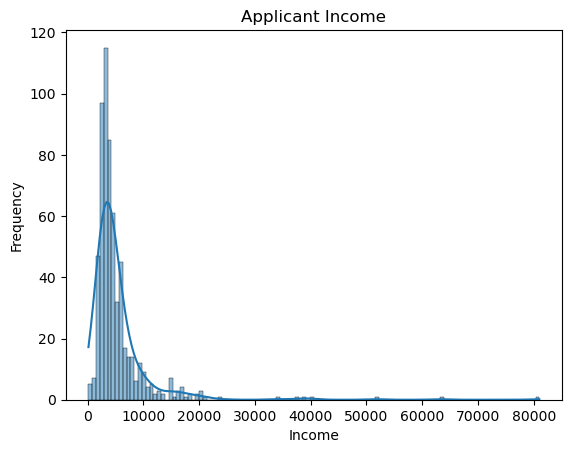

In [9]:
sns.histplot(data=df, x="ApplicantIncome", kde=True)

plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Applicant Income")

plt.show()

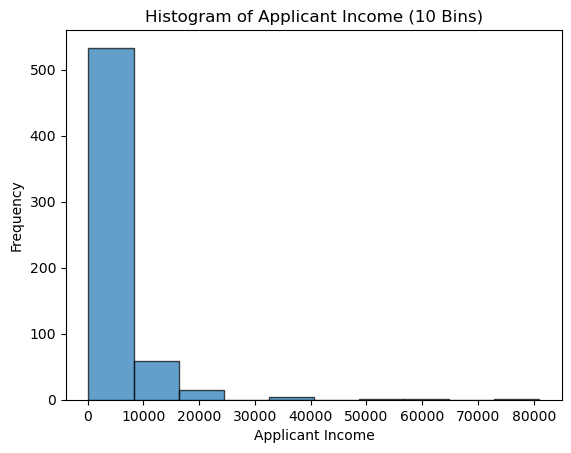

In [10]:
plt.hist(df["ApplicantIncome"], bins=10, edgecolor='k', alpha=0.7)

plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.title("Histogram of Applicant Income (10 Bins)")
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [15]:
from scipy.stats import norm

In [11]:
mean_val = 6000
std_dev_val = 2000

x = 2000
cumulative_probability = norm.cdf(x, loc=mean_val, scale=std_dev_val)

percentage = cumulative_probability * 100

print(f"clients earning less than 2000  {percentage:.2f}%.")

clients earning less than 2000  2.28%.


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ. 

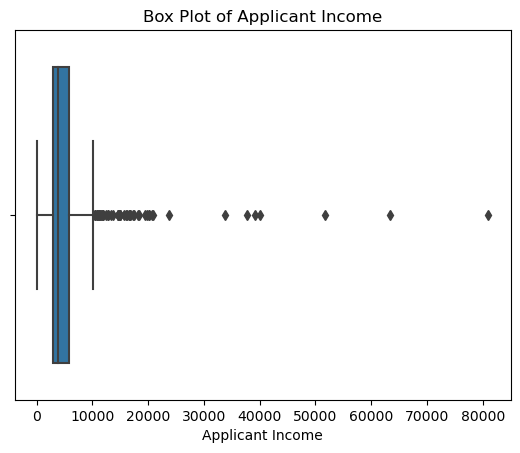

In [17]:
sns.boxplot(x="ApplicantIncome", data=df)

# Set labels and title
plt.xlabel("Applicant Income")
plt.title("Box Plot of Applicant Income")

# Show the plot
plt.show()

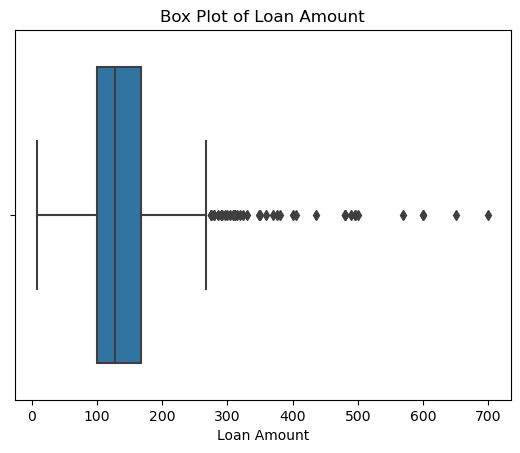

In [12]:
sns.boxplot(x="LoanAmount", data=df)

plt.xlabel("Loan Amount")
plt.title("Box Plot of Loan Amount")

plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია. 

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია. 

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [14]:
from scipy.stats import ttest_1samp,ttest_ind

In [15]:
null_hypothesis_mean = 6000

t_statistic, p_value = ttest_1samp(df['ApplicantIncome'], null_hypothesis_mean)

alpha = 0.05

if p_value < alpha:
    print("Reject the null. income is different from 6000")
else:
    print("Fail to reject the null. income is not significantly different from 6000 euros.")


Reject the null hypothesis. The average applicant income is different from 6000 euros.


In [17]:
approved = df[df['Loan_Status'] == "Y"]['ApplicantIncome']
not_approved = df[df['Loan_Status'] == "N"]['ApplicantIncome']

t_statistic, p_value = ttest_ind(approved, not_approved, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean income of received loans is different from;")
else:
    print("There is no significant difference in income between the two groups.")


There is no significant difference in income between the two groups.
